In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [25]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [26]:
train.shape

(56000, 52)

In [27]:
test.shape

(24000, 51)

In [28]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [29]:
train['default_status']=train['default_status'].map({'no':0,'yes':1})

In [30]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [31]:
test = test.drop(['Applicant_ID','form_field47','form_field14'],axis=1)
train = train.drop(['Applicant_ID','form_field47','form_field14'],axis=1)

In [32]:
train.form_field1  = train.form_field1.fillna(train.form_field1.mean())
test.form_field1  = test.form_field1.fillna(test.form_field1.mean())

train.form_field2  = train. form_field2.fillna(train.form_field2.mean())
test.form_field2  = test.form_field2.fillna(test. form_field2.mean())

train.form_field3  = train. form_field3.fillna(train.form_field3.mean())
test.form_field3  = test.form_field3.fillna(test. form_field3.mean())

train.form_field4  = train. form_field4.fillna(train.form_field4.mean())
test.form_field4  = test.form_field4.fillna(test. form_field4.mean())

train.form_field5  = train. form_field5.fillna(train.form_field5.mean())
test.form_field5  = test.form_field35.fillna(test. form_field5.mean())

train.form_field6  = train. form_field6.fillna(train.form_field6.mean())
test.form_field6  = test.form_field6.fillna(test. form_field6.mean())

train.form_field7  = train. form_field7.fillna(train.form_field7.mean())
test.form_field7  = test.form_field7.fillna(test. form_field7.mean())

train.form_field8  = train. form_field8.fillna(train.form_field8.mean())
test.form_field8  = test.form_field8.fillna(test. form_field8.mean())

train.form_field9  = train. form_field9.fillna(train.form_field9.mean())
test.form_field9  = test.form_field9.fillna(test. form_field9.mean())

train.form_field10  = train. form_field10.fillna(train.form_field10.mean())
test.form_field10  = test.form_field10.fillna(test. form_field10.mean())

train.form_field11  = train. form_field11.fillna(train.form_field11.mean())
test.form_field11  = test.form_field11.fillna(test. form_field11.mean())

train.form_field12  = train. form_field12.fillna(train.form_field12.mean())
test.form_field12  = test.form_field12.fillna(test. form_field12.mean())

train.form_field13  = train. form_field13.fillna(train.form_field13.mean())
test.form_field13  = test.form_field13.fillna(test. form_field13.mean())

train.form_field15 = train. form_field15.fillna(train.form_field15.mean())
test.form_field15  = test.form_field15.fillna(test. form_field15.mean())

train.form_field16  = train. form_field16.fillna(train.form_field16.mean())
test.form_field16  = test.form_field16.fillna(test. form_field16.mean())

train.form_field17  = train. form_field17.fillna(train.form_field17.mean())
test.form_field17  = test.form_field17.fillna(test. form_field17.mean())

train.form_field18  = train. form_field18.fillna(train.form_field18.mean())
test.form_field18  = test.form_field18.fillna(test. form_field18.mean())

train.form_field20  = train. form_field20.fillna(train.form_field20.mean())
test.form_field20  = test.form_field20.fillna(test. form_field20.mean())

train.form_field21  = train. form_field21.fillna(train.form_field21.mean())
test.form_field21  = test.form_field21.fillna(test. form_field21.mean())

train.form_field22  = train. form_field22.fillna(train.form_field22.mean())
test.form_field22  = test.form_field22.fillna(test. form_field22.mean())

train.form_field23  = train. form_field23.fillna(train.form_field23.mean())
test.form_field23  = test.form_field23.fillna(test. form_field23.mean())

train.form_field24  = train. form_field24.fillna(train.form_field24.mean())
test.form_field24  = test.form_field24.fillna(test. form_field24.mean())

train.form_field25  = train. form_field25.fillna(train.form_field25.mean())
test.form_field25  = test.form_field25.fillna(test. form_field25.mean())

train.form_field26  = train. form_field26.fillna(train.form_field26.mean())
test.form_field26 = test.form_field26.fillna(test. form_field26.mean())

train.form_field27  = train. form_field27.fillna(train.form_field27.mean())
test.form_field27 = test.form_field27.fillna(test. form_field27.mean())

train.form_field28  = train. form_field28.fillna(train.form_field28.mean())
test. form_field28  = test.form_field28.fillna(test. form_field28.mean())

train.form_field29  = train. form_field29.fillna(train.form_field29.mean())
test.form_field29  = test.form_field29.fillna(test. form_field29.mean())

train.form_field30  = train. form_field30.fillna(train.form_field30.mean())
test.form_field30  = test.form_field30.fillna(test. form_field30.mean())

train.form_field31  = train. form_field31.fillna(train.form_field31.mean())
test.form_field31  = test.form_field31.fillna(test. form_field31.mean())

train.form_field32  = train. form_field32.fillna(train.form_field32.mean())
test.form_field32  = test.form_field32.fillna(test. form_field32.mean())

train.form_field33  = train. form_field33.fillna(train.form_field33.mean())
test.form_field33  = test.form_field33.fillna(test. form_field33.mean())

train.form_field34  = train. form_field34.fillna(train.form_field34.mean())
test.form_field34  = test.form_field34.fillna(test. form_field34.mean())

train.form_field35  = train. form_field35.fillna(train.form_field35.mean())
test.form_field35 = test.form_field35.fillna(test. form_field35.mean())

train.form_field36  = train. form_field36.fillna(train.form_field36.mean())
test.form_field36 = test.form_field36.fillna(test. form_field36.mean())

train.form_field37  = train. form_field37.fillna(train.form_field37.mean())
test.form_field37  = test.form_field37.fillna(test. form_field37.mean())

train.form_field38  = train. form_field38.fillna(train.form_field38.mean())
test.form_field38  = test.form_field38.fillna(test. form_field38.mean())

train.form_field39  = train. form_field39.fillna(train.form_field39.mean())
test.form_field39  = test.form_field39.fillna(test. form_field39.mean())

train.form_field40  = train. form_field40.fillna(train.form_field40.mean())
test. form_field40  = test.form_field40.fillna(test. form_field40.mean())

train.form_field41  = train. form_field41.fillna(train.form_field41.mean())
test. form_field41  = test.form_field41.fillna(test. form_field41.mean())

train.form_field42  = train. form_field42.fillna(train.form_field42.mean())
test.form_field42  = test.form_field42.fillna(test. form_field42.mean())

train.form_field43  = train. form_field43.fillna(train.form_field43.mean())
test.form_field43  = test.form_field43.fillna(test. form_field43.mean())

train.form_field44  = train. form_field44.fillna(train.form_field44.mean())
test.orm_field44  = test.form_field44.fillna(test. form_field44.mean())

train.form_field45  = train. form_field45.fillna(train.form_field45.mean())
test.form_field45 = test.form_field45.fillna(test. form_field45.mean())

train.form_field46  = train. form_field46.fillna(train.form_field46.mean())
test.form_field46  = test.form_field46.fillna(test. form_field46.mean())


train.form_field48 = train. form_field48.fillna(train.form_field48.mean())
test.form_field48 = test.form_field48.fillna(test. form_field48.mean())

train.form_field49  = train. form_field49.fillna(train.form_field49.mean())
test.form_field49  = test.form_field49.fillna(test. form_field49.mean())

train.form_field50  = train. form_field50.fillna(train.form_field50.mean())
test.form_field50  = test.form_field50.fillna(test. form_field50.mean())


C:\Users\melod\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   form_field1     56000 non-null  float64
 1   form_field2     56000 non-null  float64
 2   form_field3     56000 non-null  float64
 3   form_field4     56000 non-null  float64
 4   form_field5     56000 non-null  float64
 5   form_field6     56000 non-null  float64
 6   form_field7     56000 non-null  float64
 7   form_field8     56000 non-null  float64
 8   form_field9     56000 non-null  float64
 9   form_field10    56000 non-null  float64
 10  form_field11    56000 non-null  float64
 11  form_field12    56000 non-null  float64
 12  form_field13    56000 non-null  float64
 13  form_field15    56000 non-null  float64
 14  form_field16    56000 non-null  float64
 15  form_field17    56000 non-null  float64
 16  form_field18    56000 non-null  float64
 17  form_field19    55996 non-null 

In [34]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,...,108.117363,0.392854,2.02,0.711632,0.00000,0.0,305244.932775,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,...,108.117363,0.314281,8.08,0.183584,0.07252,0.0,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,624447.924437,956940.0,2.626690e+06,192944.0,1079864.0,...,108.117363,0.162965,18.18,0.791136,0.00000,0.0,305244.932775,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,...,108.117363,0.488884,2.02,0.685168,0.07252,0.0,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,...,108.117363,0.275000,12.12,0.438168,0.00000,0.0,97.887502,1.427891,0.045630,0


In [35]:
train.shape

(56000, 49)

In [36]:
test.shape

(24000, 48)

In [37]:
X=train.drop(['default_status'], axis=1)
y = train.default_status
test 
X.shape

(56000, 48)

In [38]:
y.shape

(56000,)

In [39]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

In [22]:
error_list =[]
test_accuracy=[]

fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

fold.get_n_splits(X,y)

for train_index,test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test= y.iloc[train_index], y.iloc[test_index]
    
    ml= CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=4,learning_rate=0.1,od_wait=50,reg_lambda=3,bootstrap_type='Bayesian',use_best_model=True)
    
    ml.fit(X_train,y_train,eval_set= [(X_train,y_train),(X_test,y_test)],early_stopping_rounds=100,verbose=100)
    
    preds=ml.predict_proba(X_test)[:,1]
    print ('err:',roc_auc_score(y_test,preds))
    
    error_list.append(roc_auc_score(y_test,preds))
    
    p1=ml.predict_proba(test)[:,1]
    test_accuracy.append(p1)

0:	test: 0.7577931	test1: 0.7763614	best: 0.7763614 (0)	total: 351ms	remaining: 5m 50s
100:	test: 0.8263436	test1: 0.8399357	best: 0.8399357 (100)	total: 8.37s	remaining: 1m 14s
200:	test: 0.8337545	test1: 0.8423492	best: 0.8423492 (200)	total: 15.6s	remaining: 1m 2s
300:	test: 0.8393107	test1: 0.8429148	best: 0.8430085 (274)	total: 25.2s	remaining: 58.6s
400:	test: 0.8441909	test1: 0.8439478	best: 0.8439478 (400)	total: 32.7s	remaining: 48.9s
500:	test: 0.8483886	test1: 0.8439900	best: 0.8440576 (406)	total: 42.8s	remaining: 42.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8440576244
bestIteration = 406

Shrink model to first 407 iterations.
err: 0.8440576244157643
0:	test: 0.7489492	test1: 0.7480213	best: 0.7480213 (0)	total: 67.5ms	remaining: 1m 7s
100:	test: 0.8282691	test1: 0.8234404	best: 0.8234521 (99)	total: 9.65s	remaining: 1m 25s
200:	test: 0.8351082	test1: 0.8254210	best: 0.8254210 (200)	total: 18.6s	remaining: 1m 13s
300:	test: 0.8406774	test1: 0.8

In [43]:
 np.mean(error_list)

0.8278108373243287

In [51]:
test= pd.read_csv('Test.csv')

#sub = test_ID[['Application_ID']].copy()
SUB2= pd.DataFrame({'Applicant_ID':test['Applicant_ID'] , 'default_status': np.mean(test_accuracy,0)})


In [42]:
SUB2.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.330168
1,Apcnt_1000048,0.525336
2,Apcnt_1000052,0.218489
3,Apcnt_1000076,0.684670
4,Apcnt_1000080,0.326391


In [43]:
SUB2.to_csv('submission4.csv',index=False)

In [53]:
print(ml.feature_importances_)

[22.38807617  8.08443448  0.93325909  0.99252596  0.51444832  1.87270429
  1.50072908  0.64705711  1.85851796  1.92177831  1.05172745  0.76940669
  1.3033452   1.12467608  1.87136823  0.48938294  3.00842359  1.82156819
  0.76331948  1.26339572  1.27955039  0.94282234  8.08261023  3.53522657
  1.4919711   1.78652241  2.68624028  1.27047776  0.65756605  0.81998978
  0.52071948  0.52794051  2.09307428  1.1136635   1.29960352  2.40352853
  1.74749876  0.16956215  1.03878004  0.6029061   3.64022091  1.51784503
  0.46855619  2.67232668  0.52098449  0.5915834   0.99650255  1.34158263]


In [63]:
import matplotlib.pyplot as pyplt
import pandas as pd
%matplotlib inline

In [64]:
get_feature_importance(data=None,type=EFstrType.FeatureImportance,prettified= False,thread_count=-1,verbose=False)

NameError: name 'get_feature_importance' is not defined

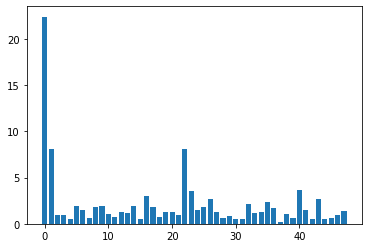

In [65]:
plt.bar(range(len(ml.feature_importances_)),ml.feature_importances_)
plt.show()

In [67]:
import matplotlib as plt
fea_imp = pd.Dataframe({'imp':ml.feature_importance,'col':X.columns})
fea_imp = fea_imp.sort_values(['imp','col'],ascending=[False]).iloc[-90 :]
- = fea_imp.plot(kind='barh',x='col',y='imp',figsize=(10,30))
plt.show()

SyntaxError: invalid syntax (<ipython-input-67-b34519194527>, line 4)

In [49]:
clf_xgb = XGBClassifier(max_depth=5,subsample=0.8,n_estimators=200,learning_rate=0.05,min_child_weight=1,random_state=5,reg_alpha=0,reg_lambda=1)
clf_xgb.fit(X_train, y_train)
y_predict = clf_xgb.predict(X_test)
y_train_predict = clf_xgb.predict(X_train)
from sklearn.metrics import accuracy_score
print ('Train accuracy',accuracy_score(y_train,y_train_predict))
print ('Test accuracy',accuracy_score(y_test,y_predict))

Train accuracy 0.8228571428571428
Test accuracy 0.8051785714285714


In [21]:
predict=clf_xgb.predict(test)

In [22]:
test=pd.read_csv('Test.csv')

In [29]:
sub2 = pd.DataFrame({'Applicant_ID':test['Applicant_ID'] , 'default_status': predict})

NameError: name 'predict' is not defined

In [24]:
sub2.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0
1,Apcnt_1000048,1
2,Apcnt_1000052,0
3,Apcnt_1000076,1
4,Apcnt_1000080,0


In [25]:
sub2.to_csv('submission3.csv',index=False)

In [28]:
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.506985
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.538018
[2]	validation_0-aucpr:0.548256
[3]	validation_0-aucpr:0.552144
[4]	validation_0-aucpr:0.552112
[5]	validation_0-aucpr:0.558662
[6]	validation_0-aucpr:0.560135
[7]	validation_0-aucpr:0.561836
[8]	validation_0-aucpr:0.564074
[9]	validation_0-aucpr:0.567952
[10]	validation_0-aucpr:0.570092
[11]	validation_0-aucpr:0.570703
[12]	validation_0-aucpr:0.573113
[13]	validation_0-aucpr:0.575635
[14]	validation_0-aucpr:0.574999
[15]	validation_0-aucpr:0.57594
[16]	validation_0-aucpr:0.576228
[17]	validation_0-aucpr:0.577667
[18]	validation_0-aucpr:0.578705
[19]	validation_0-aucpr:0.579937
[20]	validation_0-aucpr:0.580303
[21]	validation_0-aucpr:0.58145
[22]	validation_0-aucpr:0.581968
[23]	validation_0-aucpr:0.582642
[24]	validation_0-aucpr:0.583103
[25]	validation_0-aucpr:0.58396
[26]	validation_0-aucpr:0.58416
[27]	validation_0-aucpr:0.585071
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25,
              learn_rate=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=3, seed=42,
              silent=None, subsample=0.9, verbosity=1)

In [27]:
clf_xgb= XGBClassifier(seed=42,objective='binary:logistic',gamma=0.25,learn_rate=0.1,max_depth=4,reg_lambda=10,scale_pos_weight=3,subsample=0.9,colsample_bytree=0.5)

In [29]:
xgbpred = clf_xgb.predict(X_test)

In [30]:
from sklearn.metrics import balanced_accuracy_score

In [31]:
print (balanced_accuracy_score(y_test,xgbpred))

0.7416887805436709


In [32]:
predict=clf_xgb.predict(test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Applicant_ID, form_field47

In [151]:
test=pd.read_csv('Test.csv')

In [152]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [22]:

sub2 = pd.DataFrame({'Applicant_ID':test['Applicant_ID'] , 'default_status': predict})

NameError: name 'predict' is not defined

In [155]:
sub.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,0
3,Apcnt_1000076,1
4,Apcnt_1000080,0


In [156]:
sub.to_csv('submissionV1.csv',index=False)